## Generate several points randomly

In [1]:
import random
import math
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Define the temperature range and interval
temperature_min = 50
temperature_max = 3001
temperature_interval = 50

all_data_points=[]
all_labeled_points=[]
# Define the deformation gradient range and interval
deformation_min = 1.0
deformation_max = 1.098
deformation_interval = 0.002

### parameters setting
num_first_select = 5 ###number of first select points
num_itera = 1 ###number of second and subsequence
max_iteras = 100 ###number of max iteration steps
trainning_times = 0
trainning_num = num_first_select

C_v = 100.0
gamma_v = 100.0

for i in range (temperature_min,temperature_max,temperature_interval):
    for j in range (int(deformation_min*1000),int((deformation_max*1000)+1),2):
        point_s=(j,1000+i/30)
        all_data_points.append(point_s)
        
all_data_points=all_data_points
first_iter = random.sample(all_data_points,num_first_select)      

#remove first selected points from all_datas
all_data_points_set = set(all_data_points)  
first_iter_set = set(first_iter)

all_data_points_set.difference_update(first_iter_set)
all_data_points = list(all_data_points_set)
first_iter = list(first_iter_set)



with open("failure_labeled.xyz", "r") as file:
    for line in file:
        data = line.strip().split()
        first_number = float(data[0])
        second_number = int(data[1])
        fourth_number = int(data[3])
        point_x = int(first_number*1000)
        point_y = int(data[1])

        if first_number >= 1 :
            point_s_labeled=(point_x,1000+point_y/30,fourth_number)
            all_labeled_points.append(point_s_labeled)

data_lab = np.array(all_labeled_points)
input_data_lab = data_lab[:, :2]/1000  # First two columns are input
output_data_lab = data_lab[:, 2]  # Third column is output

train_data_lab, test_data_lab, train_labels_lab, test_labels_lab = train_test_split(input_data_lab, output_data_lab, test_size=0.1, random_state=300)            


## First Label

In [2]:
with open("failure_labeled.xyz", "r") as file:
    lines = file.readlines()

farilure_lab = {}

for line in lines:
    values = line.split()
    deformation = float(values[0])
    temperature = int(values[1])
    fourth_value = int(values[3])

    key = (int(deformation*1000), 1000+temperature/30)

    farilure_lab[key] = fourth_value

associated_data = []

for point in first_iter:
    deformation, temperature = point
    key = (deformation, temperature)
    
    # Check if the key exists in the dictionary
    if key in farilure_lab:
        fourth_value = farilure_lab[key]
        associated_data.append((deformation/1000, temperature/1000, fourth_value))

[(1.032, 1.0683333333333334, 1), (1.084, 1.0516666666666667, 0), (1.068, 1.0666666666666667, 0), (1.016, 1.0133333333333334, 1), (1.084, 1.09, 0)]


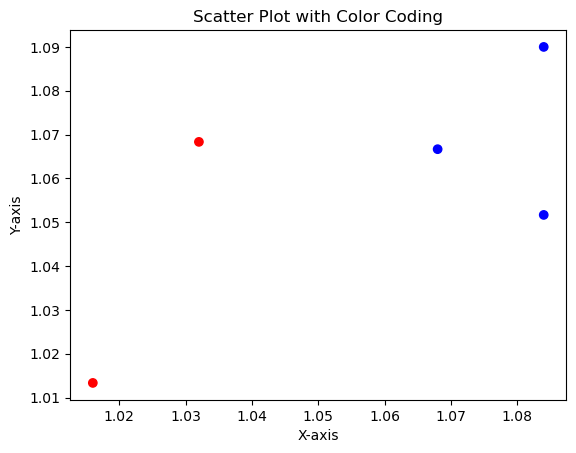

5


In [3]:
# Print the associated data
print(associated_data)

import matplotlib.pyplot as plt
# Separate the data into x, y, and color values
x = [point[0] for point in associated_data]
y = [point[1] for point in associated_data]
colors = ['blue' if point[2] == 0 else 'red' for point in associated_data]

# Create the scatter plot
plt.scatter(x, y, c=colors)

# Set labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot with Color Coding')

# Show the plot
plt.show()
print(len(associated_data))

## First Trainning

In [4]:

evaluate_accuracy = []
trainning_nums = []
trainning_times = trainning_times+1
trainning_num = trainning_num
trainning_nums.append(trainning_num)

# Extract input and output data from associated_data
data = np.array(associated_data)
input_data = data[:, :2]  # First two columns are input
output_data = data[:, 2]  # Third column is output

train_data, train_labels = input_data, output_data

model = SVC(kernel='rbf', C=C_v, gamma=gamma_v, probability=True)

model.fit(train_data, train_labels)

# Evaluate the model
test_pred = model.predict(test_data_lab)
val_accuracy = accuracy_score(test_labels_lab, test_pred)

evaluate_accuracy.append(val_accuracy)
print(len(train_data))
print(val_accuracy)

5
0.83


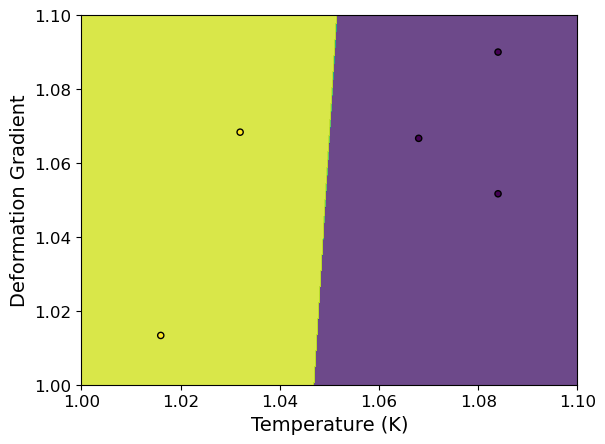

In [5]:

label_fontsize = 14
ticks_fontsize = 12
legend_fontsize = 12

# Step 1: Create a mesh grid
x_min, x_max = train_data[:, 0].min() - 0.1 , train_data[:, 0].max() + 0.1
y_min, y_max = train_data[:, 1].min() - 0.1, train_data[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.0001),
                     np.arange(y_min, y_max, 0.0001))

# Step 2: Predict classes for each point in the mesh grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Step 3: Plot the decision boundary and data points
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=20, edgecolor='k')
plt.xlabel('Temperature (K)',fontsize=label_fontsize)
plt.ylabel('Deformation Gradient',fontsize=label_fontsize)

plt.xlim(1.0, 1.1)
plt.ylim(1.0, 1.1)
plt.xticks(fontsize=ticks_fontsize)
plt.yticks(fontsize=ticks_fontsize)
#plt.savefig('it1.png')
plt.show()

In [6]:
print(evaluate_accuracy)
print(test_pred)

[0.83]
[1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0.
 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1.
 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0.
 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1.
 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1.
 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0.
 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0.
 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0.
 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1.
 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1.
 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0.
 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0.]


## First Perdiction

In [7]:
# Make predictions
all_data_points=np.array(all_data_points)
scale_all_data_points=all_data_points / 1000
predictions = model.predict_proba(scale_all_data_points)
predictions = predictions[:, 0]
print(predictions)

[0.72122604 0.79426515 0.19239414 ... 0.74317913 0.14380924 0.5444531 ]


In [8]:
print(all_data_points)
print(scale_all_data_points)
print(max(predictions))
print(min(predictions))

[[1080.         1010.        ]
 [1086.         1090.        ]
 [1018.         1035.        ]
 ...
 [1076.         1040.        ]
 [1014.         1065.        ]
 [1056.         1053.33333333]]
[[1.08       1.01      ]
 [1.086      1.09      ]
 [1.018      1.035     ]
 ...
 [1.076      1.04      ]
 [1.014      1.065     ]
 [1.056      1.05333333]]
0.8606855200900393
0.10171276911776965


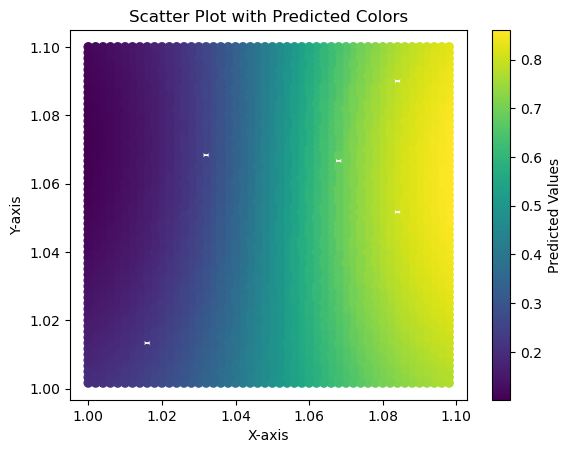

In [9]:
import matplotlib.pyplot as plt
x = [point[0] for point in scale_all_data_points]
y = [point[1] for point in scale_all_data_points]

plt.scatter(x, y, c=predictions, cmap='viridis')  # Use 'viridis' colormap or choose another colormap

# Set labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot with Predicted Colors')

# Add a color bar to indicate the color values
colorbar = plt.colorbar()
colorbar.set_label('Predicted Values')

# Show the plot
plt.show()

In [10]:

predictions = np.array(predictions)

abs_diff = np.abs(predictions - 0.5)

sorted_indices = np.argsort(abs_diff, axis=0)

nearest_indices = sorted_indices[:num_itera] 

nearest_values = predictions[nearest_indices]
nearest_data_points=all_data_points[nearest_indices]

nearest_data_points = nearest_data_points.reshape(-1, 2)
nearest_data_points = [tuple(row) for row in nearest_data_points]
all_data_points = [tuple(row) for row in all_data_points]


all_data_points_set = set(all_data_points)  
nearest_data_points_set = set(nearest_data_points)
all_data_points_set.difference_update(nearest_data_points_set)

all_data_points = list(all_data_points_set)
nearest_data_points = list(nearest_data_points_set)


In [11]:
print(len(all_data_points))
print(len(nearest_data_points))

2994
1


## second label

In [12]:
for point in nearest_data_points:
    deformation, temperature = point
    key = (deformation, temperature)
    
    # Check if the key exists in the dictionary
    if key in farilure_lab:
        fourth_value = farilure_lab[key]
        associated_data.append((deformation/1000, temperature/1000, fourth_value))
print(associated_data)

[(1.032, 1.0683333333333334, 1), (1.084, 1.0516666666666667, 0), (1.068, 1.0666666666666667, 0), (1.016, 1.0133333333333334, 1), (1.084, 1.09, 0), (1.052, 1.0466666666666666, 0)]


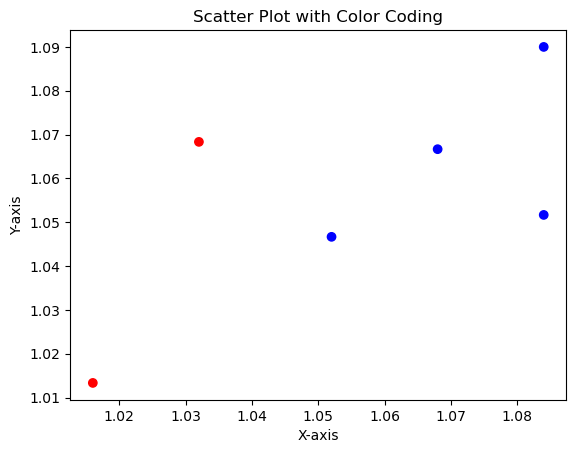

6


In [13]:
import matplotlib.pyplot as plt
# Separate the data into x, y, and color values
x = [point[0] for point in associated_data]
y = [point[1] for point in associated_data]
colors = ['blue' if point[2] == 0 else 'red' for point in associated_data]

# Create the scatter plot
plt.scatter(x, y, c=colors)

# Set labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot with Color Coding')

# Show the plot
plt.show()
print(len(associated_data))

## Second training

In [14]:
# Extract input and output data from associated_data
trainning_times = trainning_times+1
trainning_num = trainning_num + num_itera
trainning_nums.append(trainning_num)

data = np.array(associated_data)
input_data = data[:, :2]  # First two columns are input
output_data = data[:, 2]  # Third column is output

train_data = input_data
train_labels = output_data

model = SVC(kernel='rbf', C=C_v, gamma=gamma_v, probability=True)

model.fit(train_data, train_labels)

# Evaluate the model
#test_pred = model.predict_proba(test_data_lab)
test_pred = model.predict(test_data_lab)
val_accuracy = accuracy_score(test_labels_lab, test_pred)

evaluate_accuracy.append(val_accuracy)

print(evaluate_accuracy)

[0.83, 0.8066666666666666]


## second prediction

In [15]:
all_data_points=np.array(all_data_points)
scale_all_data_points=all_data_points / 1000
predictions = model.predict_proba(scale_all_data_points)
predictions = predictions[:, 0]
print(predictions)

[0.70940432 0.64822383 0.54949174 ... 0.70446997 0.50755637 0.64735651]


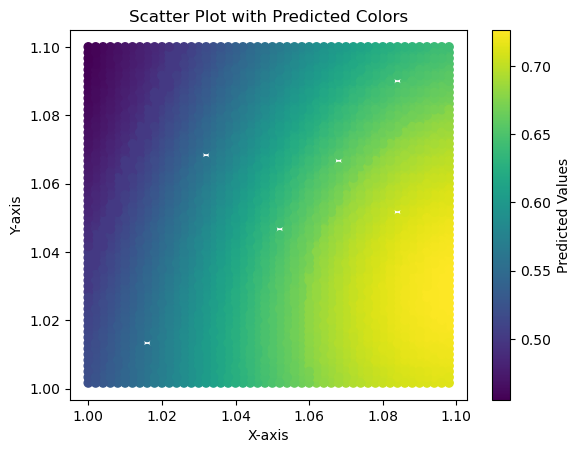

In [16]:
import matplotlib.pyplot as plt
x = [point[0] for point in scale_all_data_points]
y = [point[1] for point in scale_all_data_points]

plt.scatter(x, y, c=predictions, cmap='viridis')  # Use 'viridis' colormap or choose another colormap

# Set labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot with Predicted Colors')

# Add a color bar to indicate the color values
colorbar = plt.colorbar()
colorbar.set_label('Predicted Values')

# Show the plot
plt.show()

In [17]:
print(len(train_data))

6


## Loop

In [18]:
for main_loop in range (31):
# select the key points
    predictions = np.array(predictions)
    abs_diff = np.abs(predictions - 0.5)
    sorted_indices = np.argsort(abs_diff, axis=0)
    nearest_indices = sorted_indices[:num_itera] 
    nearest_values = predictions[nearest_indices]
    nearest_data_points=all_data_points[nearest_indices]
    nearest_data_points = nearest_data_points.reshape(-1, 2)
    nearest_data_points = [tuple(row) for row in nearest_data_points]
    all_data_points = [tuple(row) for row in all_data_points]
    all_data_points_set = set(all_data_points)  
    nearest_data_points_set = set(nearest_data_points)
    all_data_points_set.difference_update(nearest_data_points_set)
    all_data_points = list(all_data_points_set)
    nearest_data_points = list(nearest_data_points_set)
    
    for point in nearest_data_points:
        deformation, temperature = point
        key = (deformation, temperature)   
        if key in farilure_lab:
            fourth_value = farilure_lab[key]
            associated_data.append((deformation/1000, temperature/1000, fourth_value))
            
    # training
    
    trainning_times = trainning_times+1
    trainning_num = trainning_num + num_itera
    trainning_nums.append(trainning_num)
    
    data = np.array(associated_data)
    input_data = data[:, :2]  
    output_data = data[:, 2]  
    train_data = input_data
    train_labels = output_data

    model = SVC(kernel='rbf', C=C_v, gamma=gamma_v, probability=True)

    model.fit(train_data, train_labels)

    # Evaluate the model
    test_pred = model.predict(test_data_lab)
    val_accuracy = accuracy_score(test_labels_lab, test_pred)

    evaluate_accuracy.append(val_accuracy)
    #predictions
    all_data_points=np.array(all_data_points)
    scale_all_data_points=all_data_points / 1000
    predictions = model.predict_proba(scale_all_data_points)
    predictions = predictions[:, 0]
    
print(len(train_data))
print(val_accuracy)

37
0.9966666666666667


In [19]:
print(len(test_labels_lab))

300


In [20]:
print(evaluate_accuracy)

[0.83, 0.8066666666666666, 0.8066666666666666, 0.9, 0.9, 0.91, 0.9233333333333333, 0.94, 0.9266666666666666, 0.94, 0.96, 0.94, 0.9433333333333334, 0.9633333333333334, 0.9633333333333334, 0.9633333333333334, 0.99, 0.9733333333333334, 0.97, 0.9766666666666667, 0.99, 0.9966666666666667, 0.9966666666666667, 0.99, 0.9966666666666667, 0.99, 0.9833333333333333, 0.9966666666666667, 0.98, 0.9933333333333333, 0.9866666666666667, 0.9966666666666667, 0.9966666666666667]


In [21]:
print(trainning_nums)

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37]


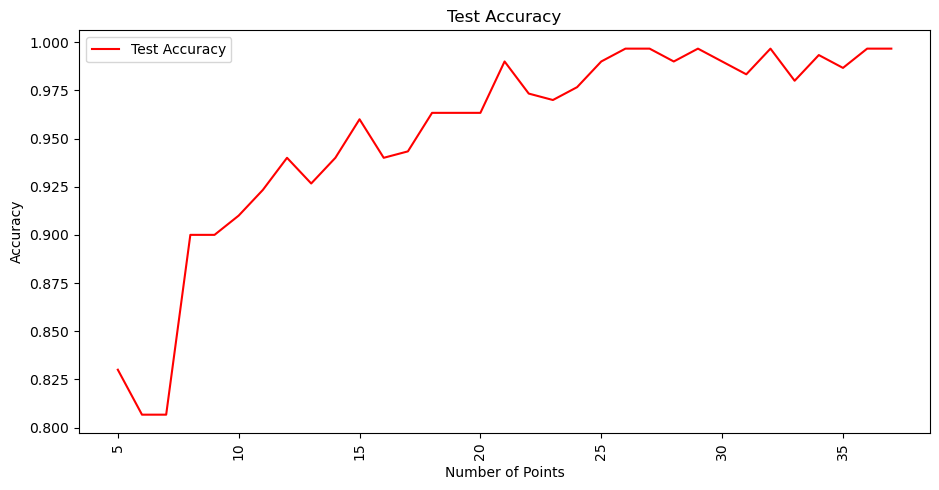

In [22]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(9.5, 5))

#plt.plot(steps, training_accuracy, c='b', label='Training Accuracy')
plt.plot(trainning_nums, evaluate_accuracy, c='r', label='Test Accuracy')
plt.title('Test Accuracy')
plt.xlabel('Number of Points')
plt.ylabel('Accuracy')
plt.legend()
plt.xticks(range(min(trainning_nums), max(trainning_nums)+1, 5), rotation=90)

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

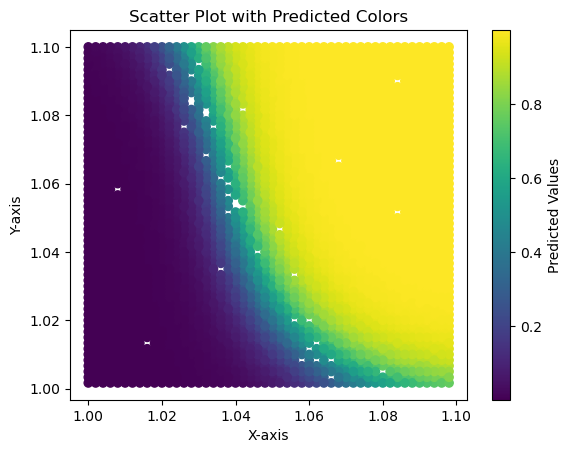

In [23]:
import matplotlib.pyplot as plt
x = [point[0] for point in scale_all_data_points]
y = [point[1] for point in scale_all_data_points]

plt.scatter(x, y, c=predictions, cmap='viridis')  # Use 'viridis' colormap or choose another colormap

# Set labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot with Predicted Colors')

# Add a color bar to indicate the color values
colorbar = plt.colorbar()
colorbar.set_label('Predicted Values')

# Show the plot
plt.show()

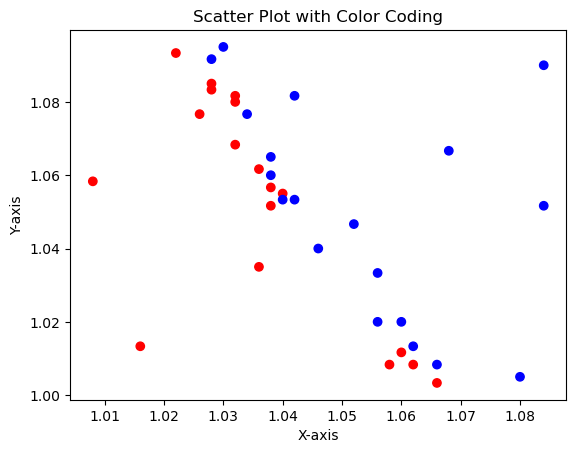

37


In [24]:
import matplotlib.pyplot as plt


# Separate the data into x, y, and color values
x = [point[0] for point in associated_data]
y = [point[1] for point in associated_data]
colors = ['blue' if point[2] == 0 else 'red' for point in associated_data]

# Create the scatter plot
plt.scatter(x, y, c=colors)

# Set labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot with Color Coding')

# Show the plot
plt.show()
print(len(associated_data))